<a href="https://colab.research.google.com/github/Pedro4010/caseifood/blob/main/clusterizacao_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Ifood

### O objetivo desse trabalho é desenvolver um modelo preditivo que vai produzir maior retorno para a próxima campanha de marketing do Ifood, além de entender as características dos clientes que estão dispostos a comprar o produto.
### Este notebook possui análises de agrupamento.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [34]:
# Conectando ao drive e lendo o csv através do pandas.
drive.mount('/content/drive')
customers = pd.read_csv('/content/drive/MyDrive/googlecolab/ifood_cleaned.csv', index_col = 'ID')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contatados. Além disso, contém um sinalizador para os clientes que responderam à campanha.


**Feature** -> **Descrição**
*   AcceptedCmp1 -> 1 se o cliente aceitou a oferta na 1st campanha, 0 se não.
*   AcceptedCmp2 -> 1 se o cliente aceitou a oferta na 2st campanha, 0 se não.
*   AcceptedCmp3 -> 1 se o cliente aceitou a oferta na 3st campanha, 0 se não.
*   AcceptedCmp4 -> 1 se o cliente aceitou a oferta na 4st campanha, 0 se não.
*   AcceptedCmp5 -> 1 se o cliente aceitou a oferta na 5st campanha, 0 se não.
*   Response(target) -> 1 se o cliente aceitou a oferta na última campanha, 0 se não.
*   Complain -> 1 se o cliente reclamou nos últimos 2 anos
*   DtCustomer -> dados de cadastro do cliente na empresa
*   Education -> nível de instrução do cliente
*   Marital -> estado civil do cliente
*   Kidhome -> número de crianças pequenas na casa do cliente
*   Teenhome -> número de adolescentes na casa do cliente
*   Income -> renda familiar anual do cliente
*   MntFishProducts -> valor gasto em produtos de peixe nos últimos 2 anos 
*   MntMeatProducts -> valor gasto em produtos de carne nos últimos 2 anos
*   MntFruits -> valor gasto em produtos de frutas nos últimos 2 anos
*   MntSweetProducts -> valor gasto em produtos doces nos últimos 2 anos
*   MntWines -> valor gasto em produtos vitivinícolas nos últimos 2 anos
*   MntGoldProds -> valor gasto em produtos de ouro (especiais) nos últimos 2 anos
*   NumDealsPurchases -> número de compras feitas com desconto
*   NunCatalogPurchases -> número de compras feitas usando o catálogo
*   NunStorePurchases -> número de compras feitas diretamente nas lojas
*   NumWebPurchases -> número de compras feitas através do site da empresa 
*   NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
*   Recency -> número de dias desde a última compra
*   Total Accepted -> Total de vezes que um único cliente aceitou a alguma das 5 tentativas da campanha
*   Age -> Idade do cliente
*   Days a customer -> Tempo que a pessoa se tornou cliente





# Insights

##### As colunas estão em um ponto de tratamento ok. Nesse ponto já conseguimos tirar alguns insights.
##### Algumas das perguntas de negócios que podem ser respondidas após esse tratamento são:
*   1 - Qual é a idade média das pessoas que mais aceitaram as campanhas ?
*   2 - Por qual meio esses clientes efetuaram as compras ?
*   3 - Como é o comportamento dos clientes que usam cupons mas não aderem a campanha ?
*   4 - Qual é a renda anual média e o MntTotal dos clientes com base na quantidade de vezes que aceitaram a campanha ? Existe uma relação entre a renda e o MntTotal ?
*   5 - Como é o perfil dos clientes que mais aderiram a campanha ? E os que não aderiram nenhuma vez ?







In [35]:
pd.set_option('max_columns',39)

In [36]:
customers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,0,0,0,0,1,0,0,0,1617,0,0,1,0,0
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,0,0,0,0,1,0,0,0,27,0,0,1,0,0
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,0,0,0,0,0,1,0,0,776,0,0,1,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,0,0,0,0,0,1,0,0,53,0,0,1,0,0
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,0,0,0,1,0,0,0,0,422,0,0,0,0,1


### **Respondendo as perguntas de negócio**

#### **1 - Qual é a idade média das pessoas que mais aceitaram as campanhas ?**

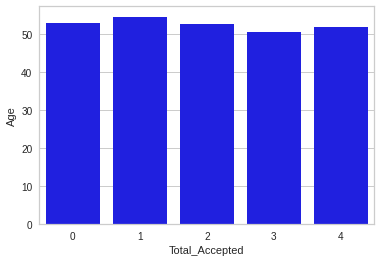

In [161]:
sns.barplot(x="Total_Accepted", y = "Age", data=customers, color = 'blue', ci=None)
plt.show()

# A média de idade não apresenta uma relação forte com as vezes que os clientes aceitaram ou não a campanha.

#### 2 - Por qual meio esses clientes efetuaram as compras ?

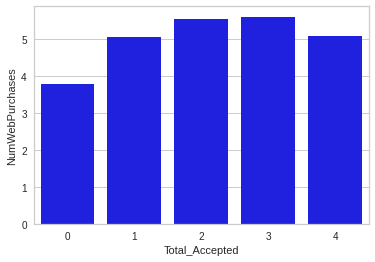

In [165]:
sns.barplot(x="Total_Accepted", y = "NumWebPurchases", data=customers, color = 'blue', ci=None)
plt.show()

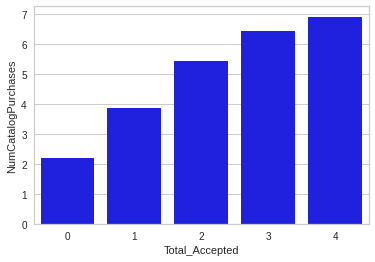

In [166]:
sns.barplot(x="Total_Accepted", y = "NumCatalogPurchases", data=customers, color = 'blue', ci=None)
plt.show()

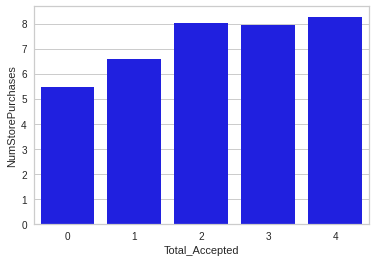

In [167]:
sns.barplot(x="Total_Accepted", y = "NumStorePurchases", data=customers, color = 'blue', ci=None)
plt.show()

#### 3 - Como é o comportamento dos clientes que usam cupons mas não aderem a campanha ?

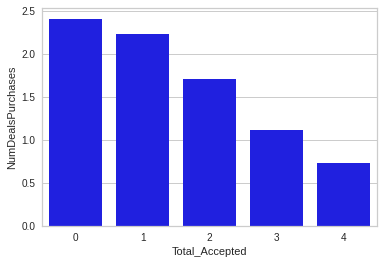

In [169]:
sns.barplot(x="Total_Accepted", y = "NumDealsPurchases", data=customers, color = 'blue', ci=None)
plt.show()

# Os clientes que não aderiram a campanha nenhuma vez são os que mais compram com 'descontos'.

#### 4 - Qual é a renda anual média e o MntTotal dos clientes com base na quantidade de vezes que aceitaram a campanha ? Existe uma relação entre a renda e o MntTotal ?

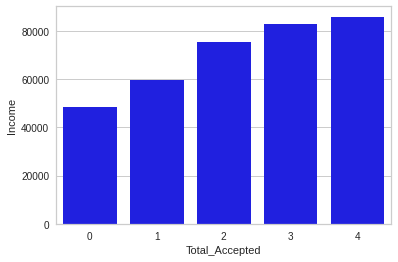

In [162]:
sns.barplot(x="Total_Accepted", y = "Income", data=customers, color = 'blue', ci=None)
plt.show()
# Olhando pela renda média anual, podemos ver que as pessoas que mais vezes aderiram as campanhas tem as maiores rendas.

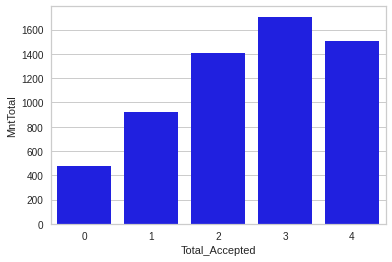

In [163]:
sns.barplot(x="Total_Accepted", y = "MntTotal", data=customers, color = 'blue', ci=None)
plt.show()
# Olhando pelo total gasto de cada cliente, podemos ver que os clientes que mais gastam aceitaram a campanha pelo menos uma vez.

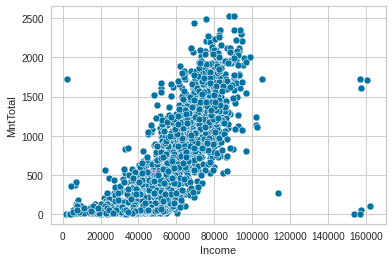

In [164]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers)
plt.show()
# Podemos ver que há uma forte relação entre essas duas variáveis.

5 - Como é o perfil dos clientes que mais aderiram a campanha ? E os que não aderiram nenhuma vez ?

In [174]:
customers[customers['Total_Accepted']==4].describe()
# Apenas 11 clientes aderiram a campanha 4 vezes.
# A renda média anual desses clientes é muito maior do que daqueles que não aceitaram nenhuma vez a campanha.
# A maioria das compras desses clientes são feitas em lojas físicas.
# A média total gasta desses clientes foi de 1501,63.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster
count,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,...,11.000000,11.0,11.000000,11.000000,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.000000,11.0,11.0,11.000000,11.000000,11.000000,11.0
mean,85861.636364,0.0,0.181818,41.545455,948.545455,38.727273,354.909091,48.090909,55.181818,56.181818,0.727273,5.090909,6.909091,8.272727,3.909091,0.272727,0.727273,1.0,1.0,...,0.909091,4.0,51.727273,336.545455,0.0,0.0,0.181818,0.181818,0.272727,0.363636,0.0,0.0,1501.636364,0.0,0.0,0.727273,0.090909,0.181818,3.0
std,9040.341346,0.0,0.404520,35.243052,532.250385,39.342320,258.888955,31.367035,49.034311,39.544451,0.467099,2.736953,2.700168,3.466725,1.921174,0.467099,0.467099,0.0,0.0,...,0.301511,0.0,15.199282,198.609851,0.0,0.0,0.404520,0.404520,0.467099,0.504525,0.0,0.0,488.088163,0.0,0.0,0.467099,0.301511,0.404520,0.0
min,65169.000000,0.0,0.000000,1.000000,152.000000,0.000000,69.000000,0.000000,0.000000,16.000000,0.000000,2.000000,3.000000,4.000000,1.000000,0.000000,0.000000,1.0,1.0,...,0.000000,4.0,28.000000,12.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,523.000000,0.0,0.0,0.000000,0.000000,0.000000,3.0
25%,83986.000000,0.0,0.000000,8.500000,567.000000,21.500000,200.500000,37.500000,23.000000,30.000000,0.500000,3.000000,4.000000,5.000000,2.500000,0.000000,0.500000,1.0,1.0,...,1.000000,4.0,38.000000,150.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1150.500000,0.0,0.0,0.500000,0.000000,0.000000,3.0
50%,85683.000000,0.0,0.000000,31.000000,1074.000000,27.000000,287.000000,50.000000,54.000000,46.000000,1.000000,5.000000,7.000000,9.000000,4.000000,0.000000,1.000000,1.0,1.0,...,1.000000,4.0,61.000000,403.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1676.000000,0.0,0.0,1.000000,0.000000,0.000000,3.0
75%,89471.500000,0.0,0.000000,70.500000,1310.000000,38.000000,396.500000,61.500000,63.000000,68.500000,1.000000,6.500000,9.000000,10.500000,5.500000,0.500000,1.000000,1.0,1.0,...,1.000000,4.0,63.500000,454.500000,0.0,0.0,0.000000,0.000000,0.500000,1.000000,0.0,0.0,1873.000000,0.0,0.0,1.000000,0.000000,0.000000,3.0
max,102692.000000,0.0,1.000000,94.000000,1492.000000,148.000000,835.000000,106.000000,172.000000,148.000000,1.000000,10.000000,10.000000,13.000000,6.000000,1.000000,1.000000,1.0,1.0,...,1.000000,4.0,68.000000,617.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2157.000000,0.0,0.0,1.000000,1.000000,1.000000,3.0


In [173]:
customers[customers['Total_Accepted']==0].describe()

# 1777 clientes não aderiram a campanha nenhuma vez.
# A renda média anual desses clientes é consideravelmente menor do que daqueles que aceitaram a campanha 4 vezes.
# A maioria das compras desses clientes são feitas em lojas físicas.
# A média total gasta desses clientes foi de 477,80.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster
count,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.0,1777.0,1777.0,1777.0,...,1777.000000,1777.0,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,48538.152555,0.500281,0.534046,49.340461,223.855937,23.613393,134.739449,32.948790,23.683737,38.963984,2.411367,3.792347,2.193022,5.474395,5.477772,0.0,0.0,0.0,0.0,...,0.082161,0.0,52.923467,354.830051,0.000563,0.001125,0.104671,0.383793,0.214969,0.261114,0.032639,0.001125,477.805290,0.092853,0.027012,0.504783,0.166010,0.209342,1.728194
std,20348.268087,0.548467,0.543279,28.986882,264.796519,37.673453,197.660774,50.696069,38.337688,48.771113,1.965681,2.748707,2.753866,3.174636,2.372108,0.0,0.0,0.0,0.0,...,0.274687,0.0,11.450727,200.722867,0.023722,0.033539,0.306215,0.486445,0.410917,0.439366,0.177741,0.033539,510.674019,0.290308,0.162163,0.500118,0.372194,0.406953,1.394107
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33438.000000,0.000000,0.000000,24.000000,18.000000,1.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,45.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,47352.000000,0.000000,1.000000,50.000000,102.000000,7.000000,49.000000,10.000000,7.000000,20.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,52.000000,357.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,253.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,63887.000000,1.000000,1.000000,75.000000,368.000000,28.000000,171.000000,39.000000,27.000000,49.000000,3.000000,5.000000,3.000000,8.000000,7.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,62.000000,528.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,834.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
max,162397.000000,2.000000,2.000000,99.000000,1396.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,...,1.000000,0.0,82.000000,699.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2440.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Essas perguntas foram feitas na intenção de entender melhor algumas das features dos nossos dados. Nas análises de clusterização poderemos ver mais alguns parâmetros importantes nas análises de nossos clientes.

In [45]:
# boxplot
# grafico de violino

In [181]:
customers_60K = customers[customers['Income']>60000.00] 

In [49]:
# Insights. 
# A média de 'Income' é maior nos clientes que aderiram a campanha o maior número de vezes é cerca de 40% maior que no geral. 
# Nos que aderiram 3,2 ou 1 vez a campanha, o valor ganho médio é um fator a se considerar, e parece influenciar em quem aceita a campanha ou não, visto
# que a média diminui consideravelmente se lervamos apenas quem não aderiu em conta.
# Podemos também ver que os clientes que estão acima da média (no caso fiz para acima de 60K para criar uma margem um pouco maior) 
# em Income não tem aderido tanto a campanha, tornando eles um bom foco para a próxima campanha.
# 2194 clientes fizeram pelo menos uma compra usando um cupom de desconto(NumDealPurchases), um número muito maior do que os que somente aderiram a campanha.
# A idade foi uma variável que me chamou atenção. A idade média é "alta", se pensarmos em quem mais consome produtos por um aplicativo de comidas como o Ifood. Pesquisando na internet achei esse link 
# (https://blog.deliverymuch.com.br/numeros-do-delivery-online-no-brasil/#:~:text=Se%20comparado%20com%20a%20popula%C3%A7%C3%A3o,servi%C3%A7os%20financeiros%20e%20redes%20sociais.)
# Esses dados são de 2020 e mostram que pessoas com mais de 50 anos consomem muito esse tipo de serviço no Brasil.
# Esta mesma pesquisa nos mostra que os cupons de desconto são os mais consumidos. Em nossos dados podemos ver um tendência acima da média de pessoas que consomem
# produtos com desconto (NumDealPurchases). 

# Clusterização

In [50]:
# Vamos fazer a clusterização agora, porém temos o target (Response), então separamos ele, precisamos do original, sem normalizar.

In [51]:
# X = Variáveis preditoras.
# Y = Variável que queremos prever.
X = customers.drop('Response', axis=1)
Y = customers['Response']

In [52]:
scaler = StandardScaler()

In [53]:
X_scaled = scaler.fit_transform(X)

In [54]:
X_scaled

array([[ 0.28821696, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [-0.26287812,  1.03255877,  0.90693402, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.91785967, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       ...,
       [ 0.23415413, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.80721077, -0.82521765,  0.90693402, ..., -1.00626965,
         2.24812234, -0.5263848 ],
       [ 0.04201381,  1.03255877,  0.90693402, ..., -1.00626965,
        -0.44481565,  1.8997509 ]])

In [55]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [56]:
X_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288217,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.017989,1.531185,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.679417,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
1,-0.262878,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.274587,-1.190545,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-0.961275,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2,0.917860,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.333729,-0.205773,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.282673,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
3,-1.183301,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.291388,-1.061881,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.918094,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
4,0.295460,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.034790,-0.953012,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.305254,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.432369,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.162664,0.135680,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,1.221032,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2236,0.562783,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,1.035390,1.958847,-1.655713,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.268717,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
2237,0.234154,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,1.035390,-1.034790,-0.982703,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1.054951,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2238,0.807211,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.103522,-0.977755,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029

In [57]:
# Dados normalizados. Agora todas as colunas vão possuir o mesmo peso. 
# Para começo da clusterização, vamos tentar encontrar o melhor número de clusters.
# O método do cotovelo é bom para começo das análises 

In [58]:
def elbow(values):
  wcss = []
  for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('WCSS')
  plt.show()

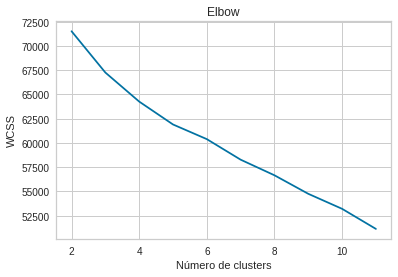

In [59]:
elbow(X_scaled)

In [60]:
# Talvez o método do cotovelo não tenha nos deixado próximo de um N ideal. 
# Vamos tentar com algumas análises com a biblioteca yellowbricks.

In [61]:
def elbow_yellow(values):
  kmeans = KMeans() 
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

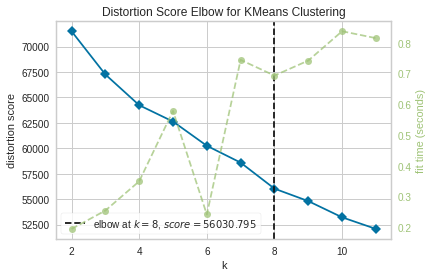

In [62]:
elbow_yellow(X_scaled)

In [63]:
def sillhouette(values, k):
  kmeans = KMeans(k) 
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(X_scaled)
  visualizer.show()

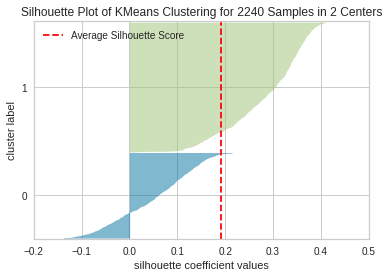

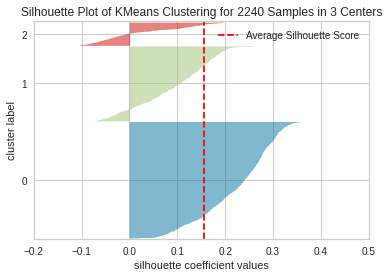

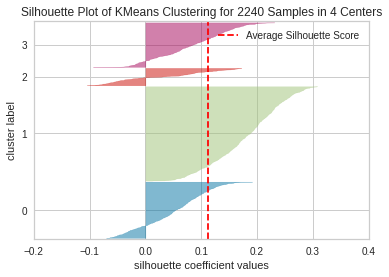

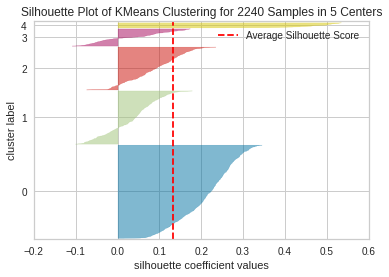

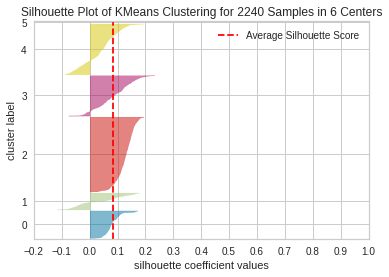

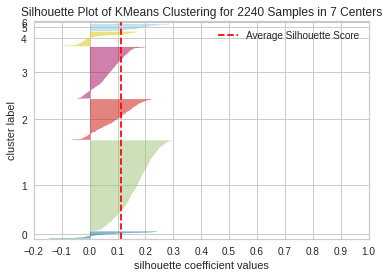

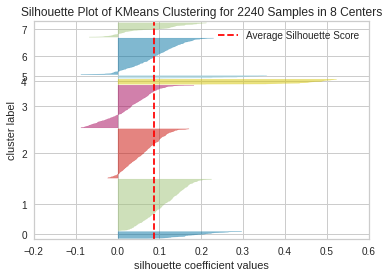

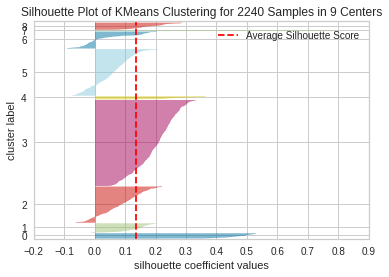

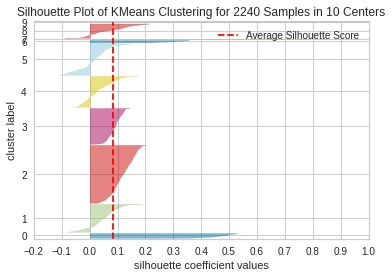

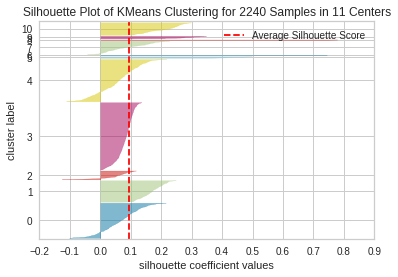

In [64]:
for i in range(2,12):
  sillhouette(X_scaled, i)

##### Reduzindo a dimensionalidade (poderia ter sido feito antes dessas análises)

In [65]:
pca = PCA()
pca.fit(X_scaled)
features = range(pca.n_components_)

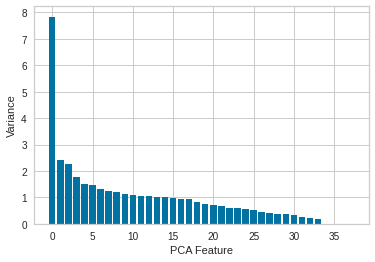

In [66]:
# Quanto maior a Variance, mais o meu número de componentes consegue explicar a variação dos dados.
# Quando a diferença ficar muito grande, é porque está overfitando, e ali fica um bom lugar para se olhar para o N de clusters.
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [67]:
# Reduzir a dimensionalidade dos dados para 5. Pensado a partir do gráfico de PCA x Variance.

In [68]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [69]:
X_pca

array([[ 3.74265427, -2.22603381, -0.59555377,  1.92986193,  0.63690905],
       [-2.560469  , -0.01683467, -0.53029942, -0.26884244,  1.28514358],
       [ 1.58823413, -1.38491366, -0.40120919,  0.10839165,  1.54342113],
       ...,
       [ 2.03003825,  1.51654424, -0.02202439,  0.46181382,  1.02655076],
       [ 1.66762193, -1.33175046,  1.19841855, -2.03847362,  1.3512423 ],
       [-2.02696066,  0.06052256,  1.91474674, -0.66731184, -1.68620972]])

In [70]:
df_X_pca = pd.DataFrame(X_pca, columns=(['PC0','PC1','PC2','PC3','PC4']))
df_X_pca

,PC0,PC1,PC2,PC3,PC4
0,3.742654,-2.226034,-0.595554,1.929862,0.636909
1,-2.560469,-0.016835,-0.530299,-0.268842,1.285144
2,1.588234,-1.384914,-0.401209,0.108392,1.543421
3,-2.743102,0.278650,-1.593980,0.287742,1.463316
4,-0.574439,-0.252384,0.150078,-0.839438,-1.884945
...,...,...,...,...,...
2235,2.555952,-1.879539,0.643504,1.903410,-1.124994
2236,-0.647421,2.071252,2.941341,-0.709164,0.983856
2237,2.030038,1.516544,-0.022024,0.461814,1.026551
2238,1.667622,-1.331750,1.198419,-2.038474,1.351242


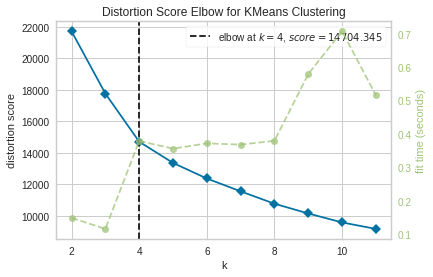

In [71]:
elbow_yellow(df_X_pca)

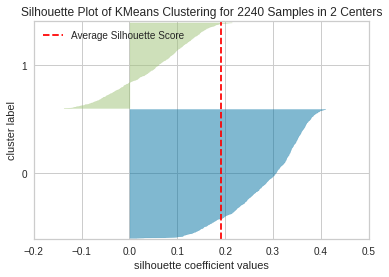

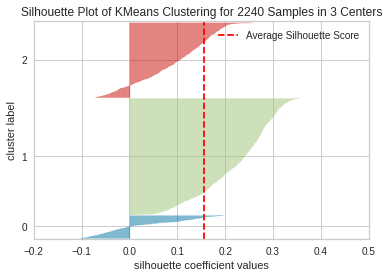

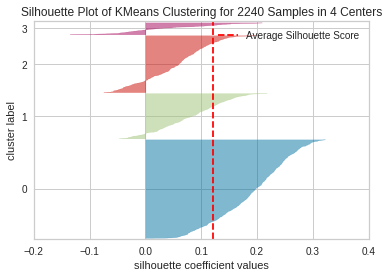

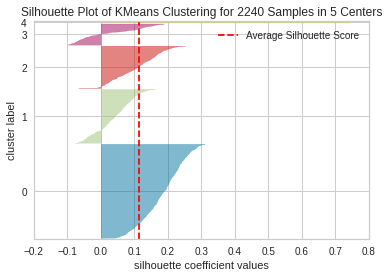

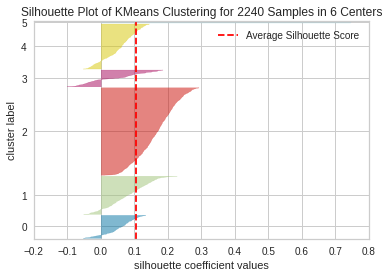

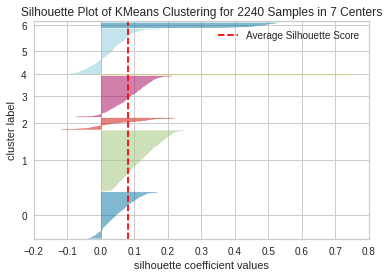

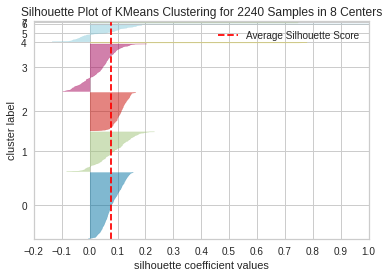

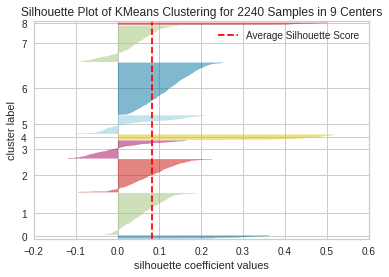

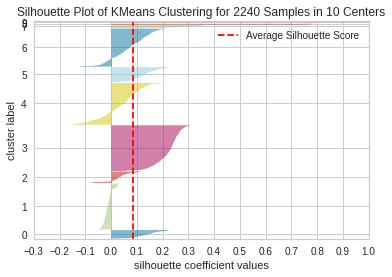

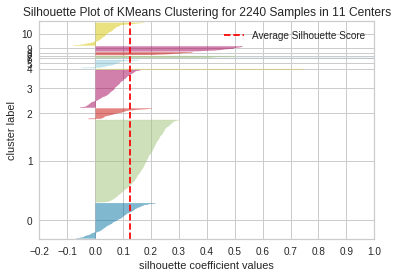

In [72]:
for i in range(2,12):
  sillhouette(df_X_pca, i)

In [73]:
# Vamos usar 5 clusters em uma primeira análise, mesmo que o método do cotovelo nos tenha recomendado 4.

In [74]:
kmeans = KMeans(n_clusters=5)
yKMeans = kmeans.fit_predict(df_X_pca)

In [75]:
yKMeans

array([0, 1, 0, ..., 4, 4, 2], dtype=int32)

In [76]:
customers['Cluster'] = yKMeans

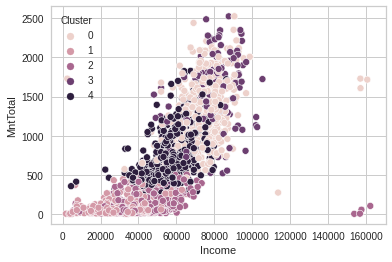

In [77]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers, hue='Cluster')
plt.show()

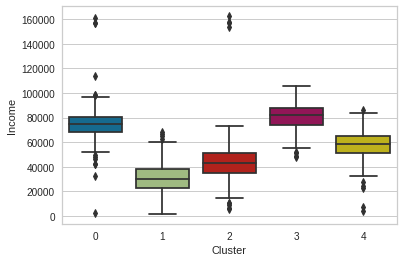

In [78]:
sns.boxplot(x='Cluster',y='Income',data=customers)
plt.savefig('teste0.png', format='png')
plt.show()

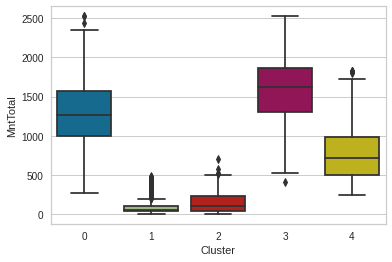

In [79]:
sns.boxplot(x='Cluster',y='MntTotal',data=customers)
plt.savefig('teste.png', format='png')
plt.show()

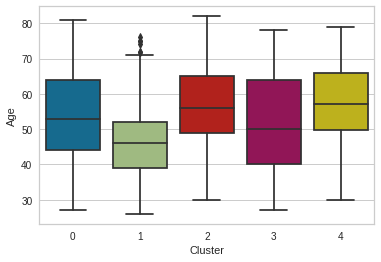

In [80]:
sns.boxplot(x='Cluster',y='Age',data=customers)
plt.savefig('teste1.png', format='png')
plt.show()

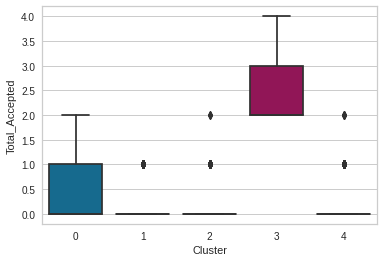

In [81]:
sns.boxplot(x='Cluster',y='Total_Accepted',data=customers)
plt.savefig('teste2.png', format='png')
plt.show()

#### Insights da Clusterização. 
##### Com 5 clusters, a divisão ficou interessante principalmente se olharmos pela renda anual do cliente (income), que talvez seja uma de nossas variáveis mais importantes. Com 5 clusters, as categorias de clientes ficaram bem definidas. Os que mais ganham são os que mais consomem no aplicativo (cluster 4). E também são eles que mais aceitam as campanhas. 
##### O cluster 0 consome um pouco menos que os cluster 4, e também aceita a menos campanhas, porém pode ser um ótimo alvo para nossa nova campanha, visto que eles tem uma renda média anual alta.
##### O cluster 2 gasta mais que os clusters 1 e 3, porém não aceitou a tantas campanhas, também pode ser um bom alvo, visto que a renda média anual deles é consideravelmente maior que dos clusters 1 e 3.
##### Os clusters 1 e 3 nos trazem clientes que gastaram pouco em produtos no aplicativo, aceitaram a campanha pouquíssimas vezes e tem uma renda média anual bem abaixo dos outros clusters. Talvez não seja esse perfil de cliente que estamos buscando para nossa nova campanha.

In [83]:
#

In [84]:
# dfi = dfi[['Year_Birth','Dt_Customer','Education','Marital_Status','Income','Kidhome',
#'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
#'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
#'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']

# Como apresentar o trabalho em uma perspectiva de negócios.

#### Começamos do problema, apresentamos o resultado final e depois detalhamos um pouco mais os principais achados.
#### Na clusterização, tentamos descobrir perfis de pessoas diferentes que possam aderir a campanha. Existem perfis diferentes ? Quais são esses perfis ?
#### Detalhamento dos resultados e não do método.
#### Por que esses perfis aderem ou não a campanha ?

In [ ]:
sns.violinplot(x='Total_Accepted',y='Income',data=customers)
plt.show()

# ANALISES ALEATÓRIAS

In [88]:
# O que eu quero ?
customers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,...,1,0,65,663,0,0,0,0,1,0,0,0,1617,0,0,1,0,0,0
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,...,0,0,68,113,0,0,0,0,1,0,0,0,27,0,0,1,0,0,1
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,...,0,0,57,312,0,0,0,0,0,1,0,0,776,0,0,1,0,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,...,0,0,38,139,0,0,0,0,0,1,0,0,53,0,0,1,0,0,1
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,...,0,0,41,161,0,0,0,1,0,0,0,0,422,0,0,0,0,1,2


In [89]:
customers['Income'].mean()

51969.86139954852

In [93]:
customers[customers['Total_Accepted']==1].mean()

Income                     59476.352993
Kidhome                        0.286154
Teenhome                       0.455385
Recency                       48.243077
MntWines                     501.738462
MntFruits                     31.283077
MntMeatProducts              247.609231
MntFishProducts               48.753846
MntSweetProducts              33.018462
MntGoldProds                  59.116923
NumDealsPurchases              2.227692
NumWebPurchases                5.070769
NumCatalogPurchases            3.864615
NumStorePurchases              6.566154
NumWebVisitsMonth              5.080000
AcceptedCmp3                   0.396923
AcceptedCmp4                   0.258462
AcceptedCmp5                   0.181538
AcceptedCmp1                   0.160000
AcceptedCmp2                   0.003077
Complain                       0.003077
Response                       0.310769
Total_Accepted                 1.000000
Age                           54.569231
Days_a_customer              348.483077


In [94]:
customers[customers['Total_Accepted']==0].mean()

Income                     48538.152555
Kidhome                        0.500281
Teenhome                       0.534046
Recency                       49.340461
MntWines                     223.855937
MntFruits                     23.613393
MntMeatProducts              134.739449
MntFishProducts               32.948790
MntSweetProducts              23.683737
MntGoldProds                  38.963984
NumDealsPurchases              2.411367
NumWebPurchases                3.792347
NumCatalogPurchases            2.193022
NumStorePurchases              5.474395
NumWebVisitsMonth              5.477772
AcceptedCmp3                   0.000000
AcceptedCmp4                   0.000000
AcceptedCmp5                   0.000000
AcceptedCmp1                   0.000000
AcceptedCmp2                   0.000000
Complain                       0.010692
Response                       0.082161
Total_Accepted                 0.000000
Age                           52.923467
Days_a_customer              354.830051


In [127]:
col = ['Income','Total_Accepted','Age', 'MntTotal']
analise = customers.filter(items=col)

In [128]:
analise

,Income,Total_Accepted,Age,MntTotal
ID,,,,
5524,58138.0,0,65,1617
2174,46344.0,0,68,27
4141,71613.0,0,57,776
6182,26646.0,0,38,53
5324,58293.0,0,41,422
...,...,...,...,...
10870,61223.0,0,55,1341
4001,64014.0,1,76,444
7270,56981.0,1,41,1241


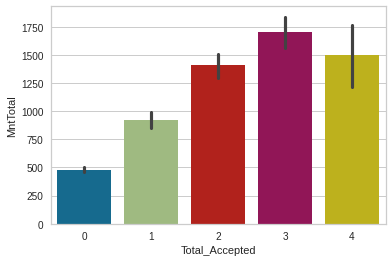

In [133]:
sns.barplot(x='Total_Accepted', y='MntTotal', data=analise)

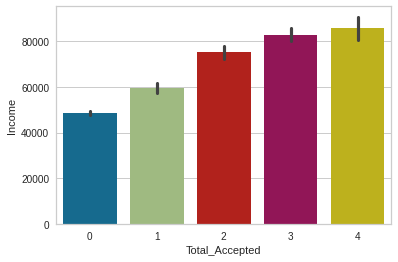

In [134]:
sns.barplot(x='Total_Accepted', y='Income', data=analise)

In [124]:
df_aceita = analise.groupby('Total_Accepted')['Income'].mean()
df_aceita

Total_Accepted
0    48538.152555
1    59476.352993
2    75172.285817
3    82877.272727
4    85861.636364
Name: Income, dtype: float64

In [126]:
sns.countplot(data='Income', x='Total_Accepted')

AttributeError: ignored